In [104]:
from sklearn.datasets import fetch_california_housing, load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, HTML



First I will run the analysis on the iris dataset...



In [112]:
#load in the data
housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [115]:
reg = KNeighborsRegressor()

n_neighbors_list = [k for k in range(1,26,2)]
weights_list = ['uniform','distance']

gs = GridSearchCV(reg, cv=5, verbose=1, iid=False, param_grid={
    'n_neighbors': n_neighbors_list,
    'weights': weights_list
    })

gs.fit(x_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   36.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [116]:
print (gs.best_params_)

{'n_neighbors': 11, 'weights': 'distance'}


In [119]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_n_neighbors','param_weights','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score'))

,param_n_neighbors,param_weights,mean_test_score,rank_test_score
11,11,distance,0.694603,1
9,9,distance,0.694495,2
13,13,distance,0.693890,3
15,15,distance,0.692810,4
7,7,distance,0.692173,5
17,17,distance,0.691435,6
19,19,distance,0.690443,7
8,9,uniform,0.690101,8
10,11,uniform,0.689567,9
21,21,distance,0.689283,10


In [120]:
data_summary = pd.DataFrame(gs.cv_results_)[['mean_fit_time','mean_score_time','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
11,0.010907,0.282733,0.694603,1
9,0.007624,0.255324,0.694495,2
13,0.009226,0.287713,0.693890,3
15,0.010046,0.305048,0.692810,4
7,0.006416,0.230466,0.692173,5
17,0.010033,0.303129,0.691435,6
19,0.006826,0.306556,0.690443,7
8,0.008441,0.242974,0.690101,8
10,0.008437,0.280133,0.689567,9
21,0.008423,0.324825,0.689283,10


Then I will run it on the mnist dataset...

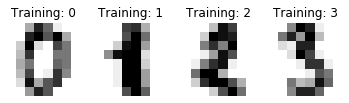

In [121]:
#load in the data
digits = load_digits()

#show ample digits
#taken from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [122]:
#no need to scale this data
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [126]:
clf = KNeighborsClassifier()

n_neighbors_list = [k for k in range(1,26,2)]
weights_list = ['uniform','distance']

gs = GridSearchCV(clf, cv=5, iid=False, param_grid={
    'n_neighbors': n_neighbors_list,
    'weights': weights_list
    })

gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [130]:
print(gs.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [132]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_n_neighbors','param_weights','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score'))

,param_n_neighbors,param_weights,mean_test_score,rank_test_score
3,3,distance,0.966665,1
2,3,uniform,0.966114,2
0,1,uniform,0.964975,3
1,1,distance,0.964975,3
5,5,distance,0.963325,5
4,5,uniform,0.962790,6
6,7,uniform,0.960001,7
7,7,distance,0.959998,8
11,11,distance,0.959451,9
9,9,distance,0.958342,10


In [73]:
#100% in sample accuracy suggests overfitting
print(gs.score(x_train, y_train))
print(gs.score(x_test, y_test))

#see if n_neighbors = 5 will overfit
clf_5 = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

1.0
0.9861111111111112
0.988865692414753
0.9805555555555555
